## Import the library

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Read the data
Dataset URL: https://archive.ics.uci.edu/ml/datasets/seeds
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

In [37]:
df=pd.read_csv('Seed_Data.csv')
df.head()

A      P       C     LK     WK  A_Coef    LKG  target
0  15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1  14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2  14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3  13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4  16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0

## Analysis the seed data

In [38]:
df.describe()

A           P           C          LK          WK      A_Coef  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.559286    0.870999    5.628533    3.258605    3.700201   
std      2.909699    1.305959    0.023629    0.443063    0.377714    1.503557   
min     10.590000   12.410000    0.808100    4.899000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.262250    2.944000    2.561500   
50%     14.355000   14.320000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000   15.715000    0.887775    5.979750    3.561750    4.768750   
max     21.180000   17.250000    0.918300    6.675000    4.033000    8.456000   

              LKG      target  
count  210.000000  210.000000  
mean     5.408071    1.000000  
std      0.491480    0.818448  
min      4.519000    0.000000  
25%      5.045000    0.000000  
50%      5.223000    1.000000  
75%      5.877000    2.000000  
max      6.550000    2.000000

In [39]:
df.shape

(210, 8)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


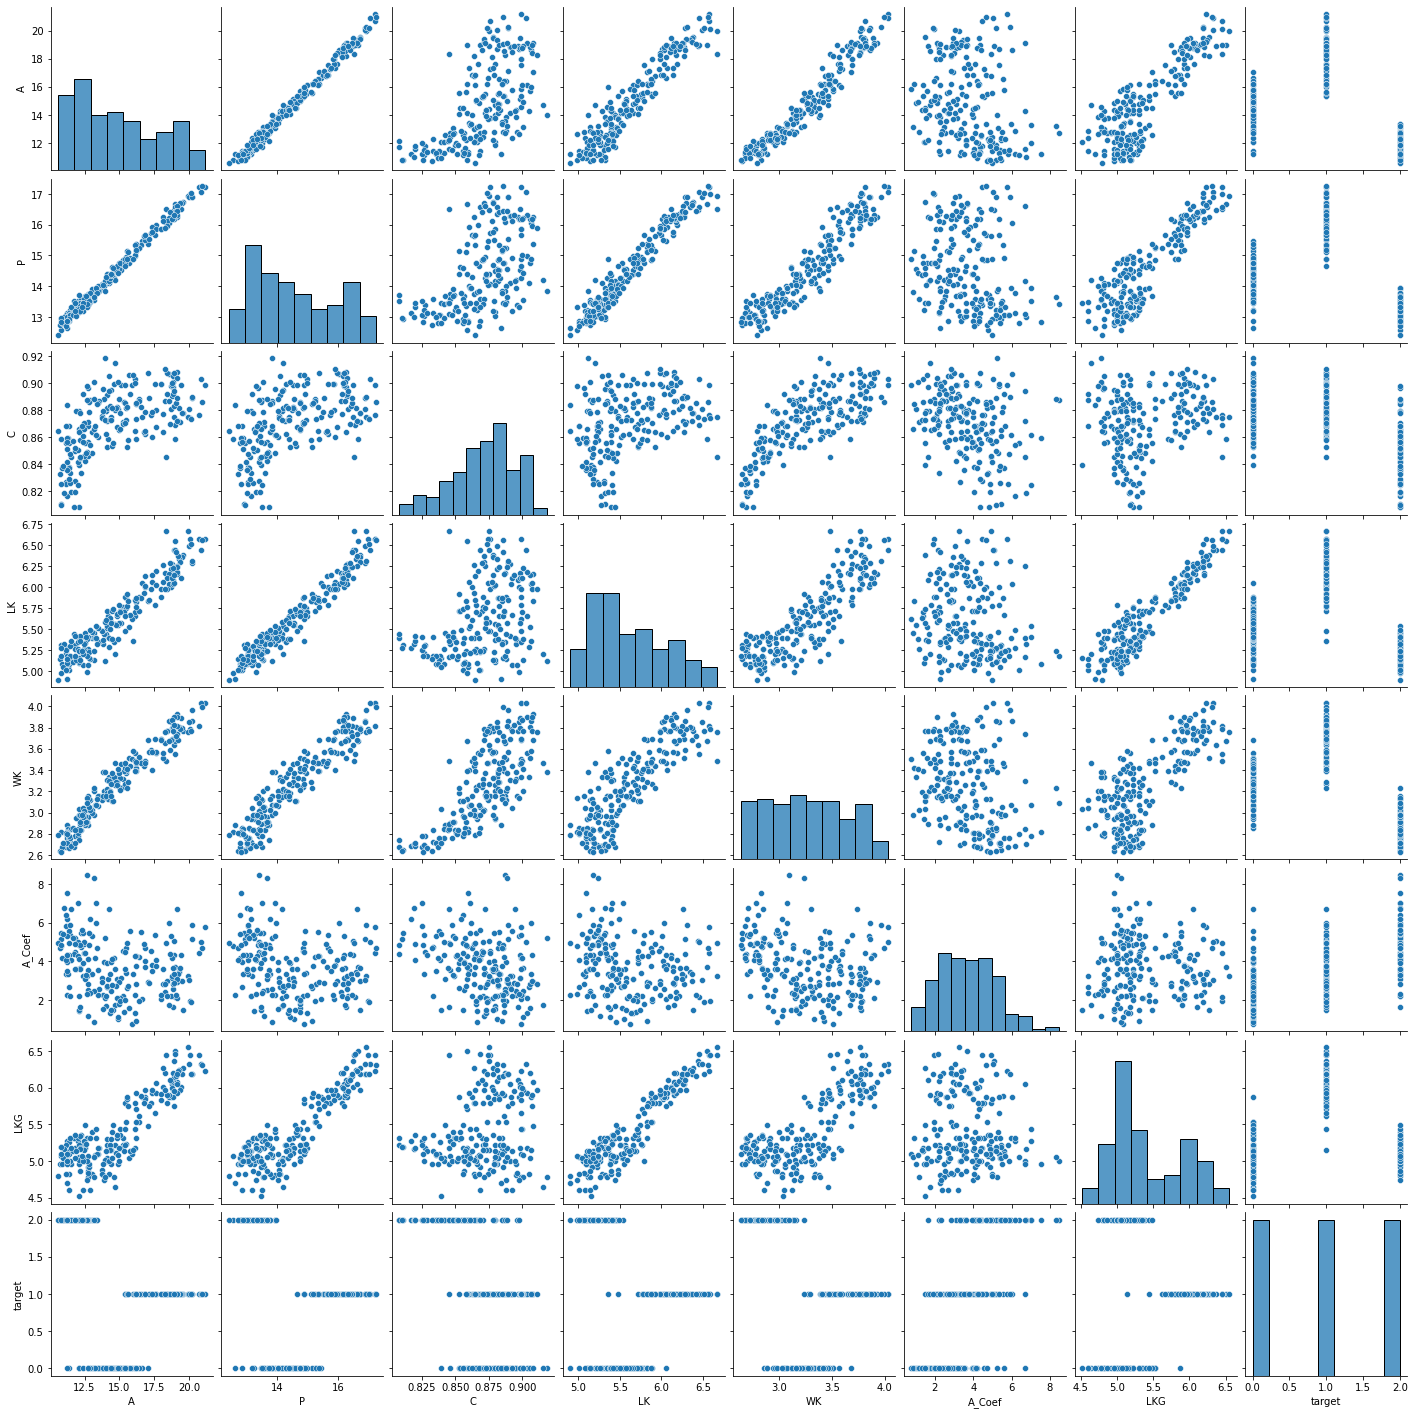

In [41]:
sns.pairplot(df).savefig('pairplot.png')

<AxesSubplot:>

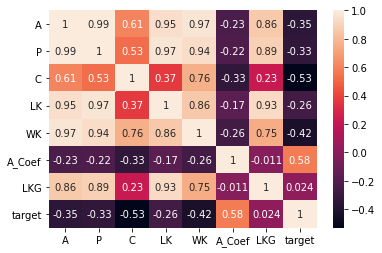

In [42]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)

Higer positives  values means higher correlation

## Split the data into features label:x and target label: y

In [43]:
features=df.iloc[:,0:7]
target=df.iloc[:,7]

In [44]:
features[:5]

A      P       C     LK     WK  A_Coef    LKG
0  15.26  14.84  0.8710  5.763  3.312   2.221  5.220
1  14.88  14.57  0.8811  5.554  3.333   1.018  4.956
2  14.29  14.09  0.9050  5.291  3.337   2.699  4.825
3  13.84  13.94  0.8955  5.324  3.379   2.259  4.805
4  16.14  14.99  0.9034  5.658  3.562   1.355  5.175

In [45]:
target[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Scaling the data

In [46]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaled_data=scaling.fit_transform(features)
features=pd.DataFrame(scaled_data,columns=features.columns)
features.head()

A         P         C        LK        WK    A_Coef       LKG
0  0.142098  0.215462  0.000061  0.304218  0.141702 -0.986152 -0.383577
1  0.011188  0.008224  0.428515 -0.168625  0.197432 -1.788166 -0.922013
2 -0.192067 -0.360201  1.442383 -0.763637  0.208048 -0.667479 -1.189192
3 -0.347091 -0.475333  1.039381 -0.688978  0.319508 -0.960818 -1.229983
4  0.445257  0.330595  1.374509  0.066666  0.805159 -1.563495 -0.475356

##  K-Means Clustering

In [47]:
from sklearn.cluster import KMeans

## Evaluate the model 
- silhouette score
- Adjusted rand score
- Normalized nutual info score

In [48]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

## Split the features for fitting different cluster
- A and P : cluster 3
- WK and LK : cluster 5
- C and LKG : cluster 7

## A and P : Cluster 3

In [49]:
data=features[['A','P']]
data.head()

A         P
0  0.142098  0.215462
1  0.011188  0.008224
2 -0.192067 -0.360201
3 -0.347091 -0.475333
4  0.445257  0.330595

In [50]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(data)


KMeans(n_clusters=3)

In [51]:
print(kmeans.cluster_centers_)
kmeans.labels_

[[ 0.06589034  0.06009157]
 [ 1.36875295  1.36930283]
 [-0.97367946 -0.96960009]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

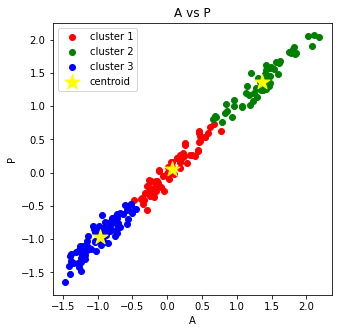

In [52]:
x=data['A']
y=data['P']
plt.figure(figsize=(5,5))
plt.scatter(x[kmeans.labels_==0],y[kmeans.labels_==0],c='red',label='cluster 1')
plt.scatter(x[kmeans.labels_==1],y[kmeans.labels_==1],c='green',label='cluster 2')
plt.scatter(x[kmeans.labels_==2],y[kmeans.labels_==2],c='blue',label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=250,marker='*',color='yellow',label='centroid')
plt.xlabel('A')
plt.ylabel('P')
plt.title('A vs P')
plt.legend()

In [53]:
score_silhouette=silhouette_score(data,kmeans.labels_)
score_ami=adjusted_rand_score(kmeans.labels_,target)
score_nmi=normalized_mutual_info_score(kmeans.labels_,target)

print('Silhouette score: ',score_silhouette)
print('AMI score: ',score_ami)
print('NMI score: ',score_nmi)

Silhouette score:  0.6215680670684475
AMI score:  0.6596051225232068
NMI score:  0.6896230852304109


## WK and LK : Cluster 5

In [54]:
data=features[['WK','LK']]
data.head()

WK        LK
0  0.141702  0.304218
1  0.197432 -0.168625
2  0.208048 -0.763637
3  0.319508 -0.688978
4  0.805159  0.066666

In [55]:
kmeans=KMeans(n_clusters=5,init='random',random_state=42)
kmeans.fit(data)


KMeans(init='random', n_clusters=5, random_state=42)

In [56]:
print(kmeans.cluster_centers_)
kmeans.labels_

[[ 0.53805475  0.50759016]
 [-0.63871804 -0.82141158]
 [-1.33087162 -0.99008373]
 [ 1.36291481  1.48124698]
 [ 0.01904315 -0.27214354]]


array([0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       0, 1, 0, 0, 1, 1, 4, 4, 1, 0, 4, 4, 0, 0, 0, 0, 4, 4, 1, 1, 1, 0,
       4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 1, 2, 2, 1, 1, 1, 1,
       4, 4, 4, 1, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 4, 3, 3, 0, 3, 0, 3, 3,
       0, 0, 0, 4, 3, 0, 0, 0, 1, 4, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1])

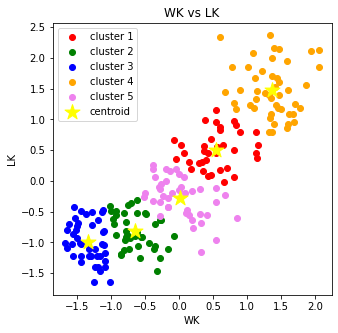

In [57]:
x=data['WK']
y=data['LK']
plt.figure(figsize=(5,5))
plt.scatter(x[kmeans.labels_==0],y[kmeans.labels_==0],c='red',label='cluster 1')
plt.scatter(x[kmeans.labels_==1],y[kmeans.labels_==1],c='green',label='cluster 2')
plt.scatter(x[kmeans.labels_==2],y[kmeans.labels_==2],c='blue',label='cluster 3')
plt.scatter(x[kmeans.labels_==3],y[kmeans.labels_==3],c='orange',label='cluster 4')
plt.scatter(x[kmeans.labels_==4],y[kmeans.labels_==4],c='violet', label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=250,marker='*',color='yellow',label='centroid')
plt.xlabel('WK')
plt.ylabel('LK')
plt.title('WK vs LK')
plt.legend()

In [58]:
score_silhouette=silhouette_score(data,kmeans.labels_)
score_ami=adjusted_rand_score(kmeans.labels_,target)
score_nmi=normalized_mutual_info_score(kmeans.labels_,target)

print('Silhouette score: ',score_silhouette)
print('AMI score: ',score_ami)
print('NMI score: ',score_nmi)

Silhouette score:  0.39023299534018574
AMI score:  0.45623345086966643
NMI score:  0.5573758019700146


## C and LKG : Cluster 7

In [59]:
data=features[['C','LKG']]
data.head()

C       LKG
0  0.000061 -0.383577
1  0.428515 -0.922013
2  1.442383 -1.189192
3  1.039381 -1.229983
4  1.374509 -0.475356

In [60]:
kmeans=KMeans(n_clusters=7,init='random',n_init=8,random_state=10)
kmeans.fit(data)


KMeans(init='random', n_clusters=7, n_init=8, random_state=10)

In [61]:
print(kmeans.cluster_centers_)
kmeans.labels_

[[-1.91543578 -0.48657372]
 [-0.76530813 -0.57953337]
 [ 0.22534776  1.6822485 ]
 [ 0.2239211  -0.69660287]
 [ 1.16683792 -1.04837167]
 [-0.19625554  0.68377689]
 [ 1.12051198  0.96219406]]


array([3, 3, 4, 4, 4, 4, 3, 4, 5, 6, 3, 3, 4, 3, 3, 4, 4, 4, 4, 3, 1, 3,
       4, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 6, 5, 6, 3, 4, 3, 3, 4, 5,
       4, 3, 3, 3, 3, 3, 3, 4, 1, 3, 5, 5, 3, 4, 3, 1, 3, 4, 4, 3, 3, 4,
       3, 1, 3, 1, 2, 5, 5, 6, 5, 5, 5, 2, 2, 6, 6, 6, 2, 2, 2, 2, 6, 2,
       6, 6, 2, 6, 6, 6, 2, 5, 2, 2, 2, 2, 6, 6, 6, 2, 2, 6, 6, 2, 2, 6,
       6, 5, 6, 2, 2, 2, 6, 2, 6, 2, 2, 2, 5, 6, 4, 6, 2, 6, 2, 6, 6, 6,
       5, 5, 6, 6, 2, 5, 5, 6, 1, 5, 1, 1, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 1, 3, 0, 1, 3, 0, 1, 3, 3, 3,
       1, 4, 1, 4, 3, 3, 1, 3, 1, 3, 1, 3])

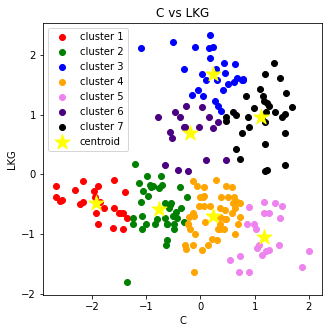

In [62]:
x=data['C']
y=data['LKG']
plt.figure(figsize=(5,5))
plt.scatter(x[kmeans.labels_==0],y[kmeans.labels_==0],c='red',label='cluster 1')
plt.scatter(x[kmeans.labels_==1],y[kmeans.labels_==1],c='green',label='cluster 2')
plt.scatter(x[kmeans.labels_==2],y[kmeans.labels_==2],c='blue',label='cluster 3')
plt.scatter(x[kmeans.labels_==3],y[kmeans.labels_==3],c='orange',label='cluster 4')
plt.scatter(x[kmeans.labels_==4],y[kmeans.labels_==4],c='violet', label='cluster 5')
plt.scatter(x[kmeans.labels_==5],y[kmeans.labels_==5],c='indigo',label='cluster 6')
plt.scatter(x[kmeans.labels_==6],y[kmeans.labels_==6],c='black',label='cluster 7')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=250,marker='*',color='yellow',label='centroid')
plt.xlabel('C')
plt.ylabel('LKG')
plt.title('C vs LKG')
plt.legend()

In [63]:
score_silhouette=silhouette_score(data,kmeans.labels_)
score_ami=adjusted_rand_score(kmeans.labels_,target)
score_nmi=normalized_mutual_info_score(kmeans.labels_,target)

print('Silhouette score: ',score_silhouette)
print('AMI score: ',score_ami)
print('NMI score: ',score_nmi)

Silhouette score:  0.36910097821857346
AMI score:  0.3185611937574153
NMI score:  0.4715913766027543
